In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [3]:
file_path_athlete_events = "data/athlete_events.csv"
athlete_events_data = pd.read_csv(file_path_athlete_events)

gb_athletes = athlete_events_data[athlete_events_data['NOC'] == 'GBR']
gb_rowing = gb_athletes[gb_athletes['Sport'] == 'Rowing']
gb_cycling = gb_athletes[gb_athletes['Sport'] == 'Cycling']
gb_sailing = gb_athletes[gb_athletes['Sport'] == 'Sailing']

medal_trend_rowing = gb_rowing.dropna(subset=['Medal']).groupby('Year')['Medal'].count()
medal_trend_cycling = gb_cycling.dropna(subset=['Medal']).groupby('Year')['Medal'].count()
medal_trend_sailing = gb_sailing.dropna(subset=['Medal']).groupby('Year')['Medal'].count()


medal_trend_df = pd.DataFrame({'Rowing': medal_trend_rowing, 'Cycling': medal_trend_cycling, 'Football': medal_trend_sailing}).fillna(0) # Lägg till sporter på liknanade sätt i denna för att få in den på det nedanför denna cellen såväl som den samlade px grafen sen
display(medal_trend_df)
# print("Rowing")
# display(medal_trend_rowing.head(3))
# print("\nCycling")
# display(medal_trend_cycling.head(3))

,Rowing,Cycling,Football
Year,,,
1896,0.0,2.0,0.0
1900,1.0,1.0,14.0
1906,0.0,6.0,0.0
1908,32.0,14.0,37.0
1912,24.0,13.0,0.0
1920,10.0,9.0,4.0
1924,5.0,2.0,5.0
1928,16.0,11.0,0.0
1932,6.0,6.0,2.0


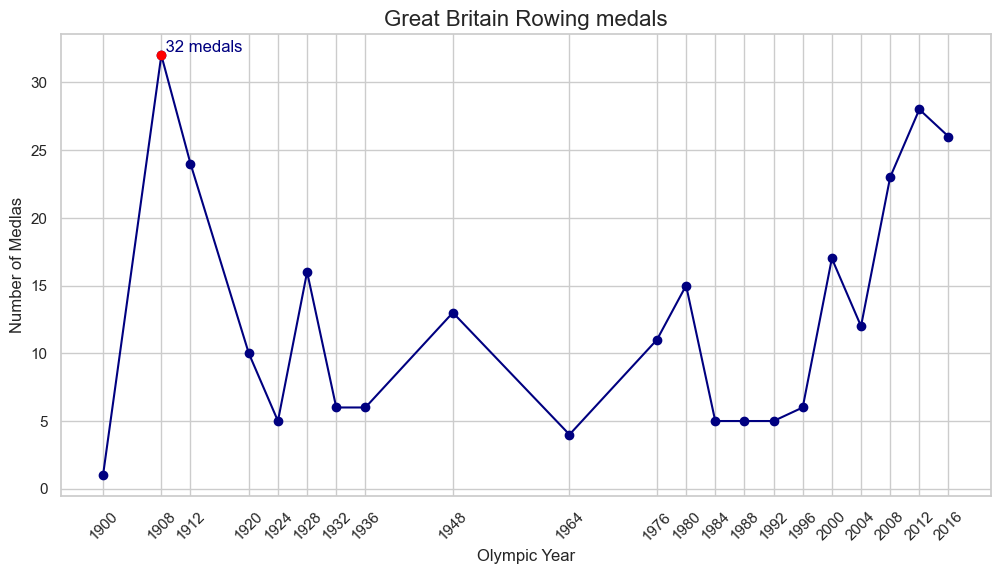

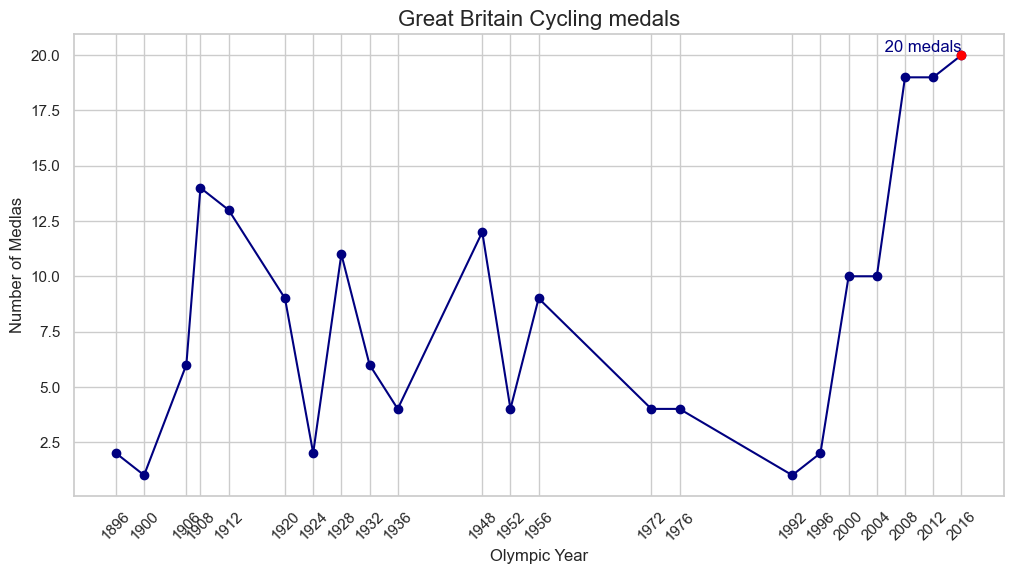

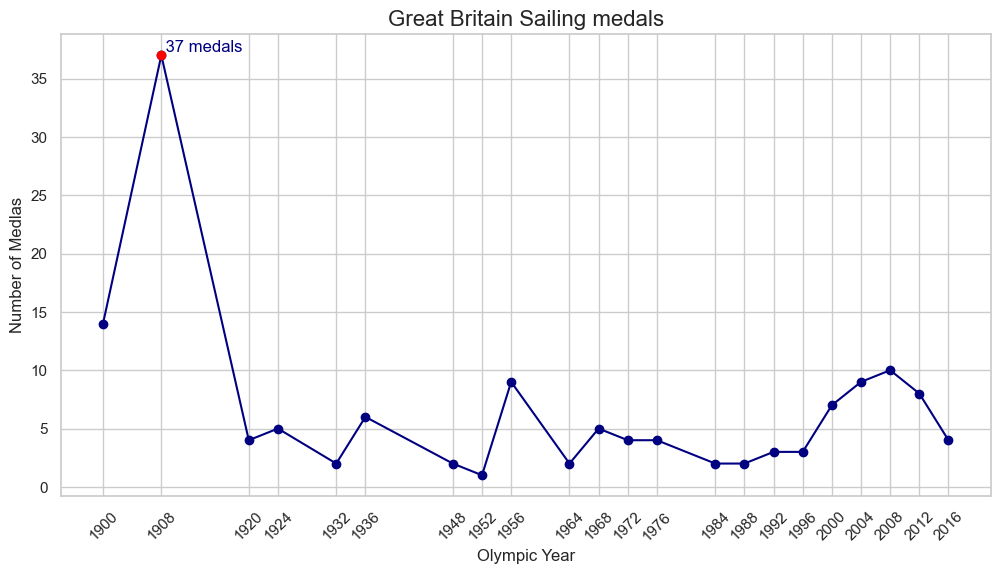

In [4]:
sns.set(style="whitegrid")

# Rowing
plt.figure(figsize=[12, 6])
plt.plot(medal_trend_rowing.index, medal_trend_rowing.values, marker='o', color='navy', linestyle='-')

peak_years = medal_trend_rowing[medal_trend_rowing == medal_trend_rowing.max()]
plt.scatter(peak_years.index, peak_years.values, color='red', zorder=5)

for year, medals in peak_years.items():
    plt.text(year, medals, f' {medals} medals', verticalalignment='bottom', horizontalalignment='left', color='navy')

plt.title('Great Britain Rowing medals', fontsize=16)
plt.xticks(medal_trend_rowing.index)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medlas', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout

plt.show()

# Cycling
# (ISAK) Göra subplots här!
plt.figure(figsize=[12, 6])
plt.plot(medal_trend_cycling.index, medal_trend_cycling.values, marker='o', color='navy', linestyle='-')

peak_years = medal_trend_cycling[medal_trend_cycling == medal_trend_cycling.max()]
plt.scatter(peak_years.index, peak_years.values, color='red', zorder=5)

for year, medals in peak_years.items():
    plt.text(year, medals, f' {medals} medals', verticalalignment='bottom', horizontalalignment='right', color='navy')

plt.title('Great Britain Cycling medals', fontsize=16)
plt.xticks(medal_trend_cycling.index)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medlas', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout

plt.show()

# Sailing
plt.figure(figsize=[12, 6])
plt.plot(medal_trend_sailing.index, medal_trend_sailing.values, marker='o', color='navy', linestyle='-')

peak_years = medal_trend_sailing[medal_trend_sailing == medal_trend_sailing.max()]
plt.scatter(peak_years.index, peak_years.values, color='red', zorder=5)

for year, medals in peak_years.items():
    plt.text(year, medals, f' {medals} medals', verticalalignment='bottom', color='navy')

plt.title('Great Britain Sailing medals', fontsize=16)
plt.xticks(medal_trend_sailing.index)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medlas', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout

plt.show()

In [7]:
# Liten px graf för sammanställning, väldigt ofärdig.
px.bar(medal_trend_df, 
    title=f"Medal trend for {', '.join(medal_trend_df.columns)}",
    labels={'index': 'Year', 'value': 'Medals', 'variable': 'Sport'},
    # barmode='group',
    color_discrete_sequence=['navy', 'red', 'green'],
    hover_data=['value', 'variable'],
    hover_name='variable',
    )

In [8]:
medal_summary = []
sports = ['Cycling', 'Rowing', 'Sailing']

for sport in sports:
    sport_data = gb_athletes[gb_athletes['Sport'] == sport]

    for gender in ['M', 'F']:
        medals = sport_data[sport_data['Sex'] == gender]['Medal'].value_counts()

        dict = {
            'Sport': sport,
            'Gender': 'Men' if gender == 'M' else 'Women',
            'Gold': medals.get('Gold', 0),
            'Silver': medals.get('Silver', 0),
            'Bronze': medals.get('Bronze', 0),
            'Total': medals.sum() 
        }

        medal_summary.append(dict)
        
medal_summary = pd.DataFrame(medal_summary)
medal_summary

,Sport,Gender,Gold,Silver,Bronze,Total
0,Cycling,Men,46,62,53,161
1,Cycling,Women,13,6,2,21
2,Rowing,Men,101,94,38,233
3,Rowing,Women,8,25,4,37
4,Sailing,Men,60,46,23,129
5,Sailing,Women,11,2,1,14


In [20]:
px.histogram(medal_summary, 
    x='Sport',
    y=['Gold', 'Silver', 'Bronze'],
    title=f"Medal summary for {', '.join(medal_summary['Sport'].unique())}",
    labels={'index': 'Year', 'value': 'Medals', 'variable': 'Sport'},
    barmode='group',
    color_discrete_sequence=['gold', 'silver', 'brown'],
    hover_data=['value', 'variable'],
    hover_name='variable',
    )